In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scIB

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

scanpy==1.4.3 anndata==0.6.20 umap==0.3.9 numpy==1.16.3 scipy==1.3.0 pandas==0.24.2 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
plt.rcParams['figure.figsize'] = 8,8

In [3]:
data_dir = '../../data/'
adata = sc.read_10x_mtx(
    data_dir+'filtered_gene_bc_matrices/hg19/', # the directory with the `.mtx` file
    var_names='gene_symbols',                   # use gene symbols for the variable names (variables-axis index)
    cache=True) 

... reading from cache file cache/..-..-data-filtered_gene_bc_matrices-hg19-matrix.h5ad


In [4]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738 
    var: 'gene_ids'

In [5]:
adata.var_names_make_unique()

## Preprocessing

### QC

In [6]:
scIB.preprocessing.summarize_counts(adata, mt_gene_regex='^MT-')

In [7]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738 
    obs: 'n_counts', 'log_counts', 'n_genes', 'percent_mito'
    var: 'gene_ids'

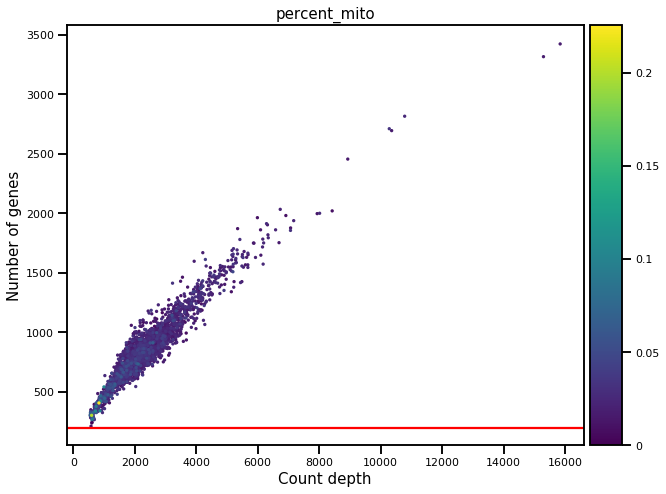

Gene Threshold: (200, inf)


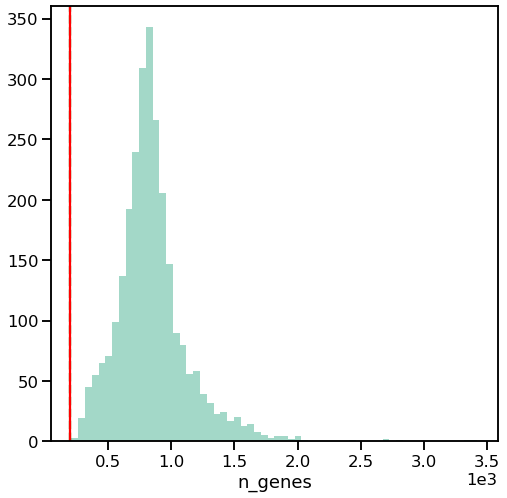

lower threshold: 200


/home/michaela/miniconda3/envs/sc_tutorial/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/michaela/miniconda3/envs/sc_tutorial/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


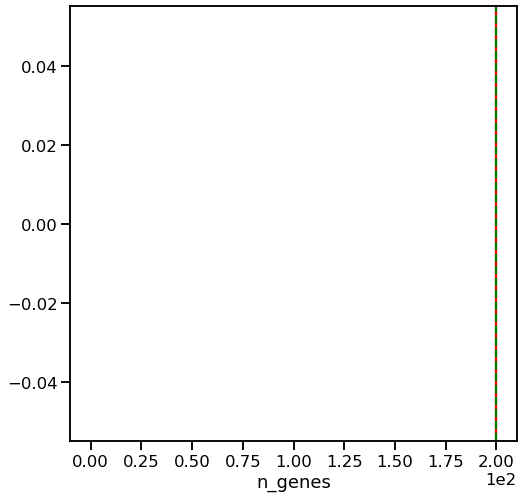

In [8]:
scIB.preprocessing.plot_QC(adata, color='percent_mito', gene_threshold=(200,np.inf))

In [9]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19024 genes that are detected in less than 3 cells


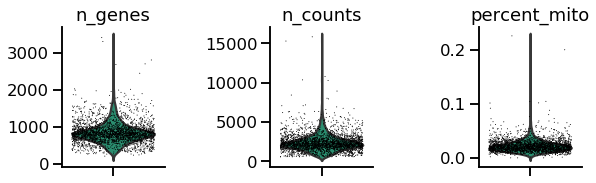

In [10]:
sc.pl.violin(adata, keys=['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

### Normalization

In [11]:
scIB.preprocessing.normalize(adata)

computing PCA with n_comps = 15
    finished (0:00:01.79)
computing neighbors
    using 'X_pca' with n_pcs = 15
    finished (0:00:02.54) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.19) --> found 10 clusters and added
    'groups', the cluster labels (adata.obs, categorical)


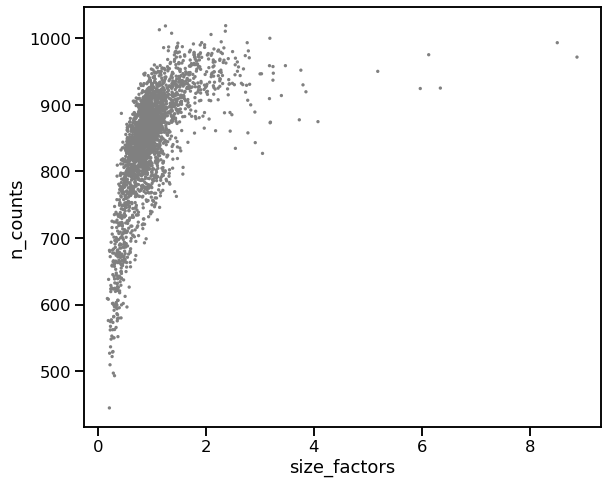

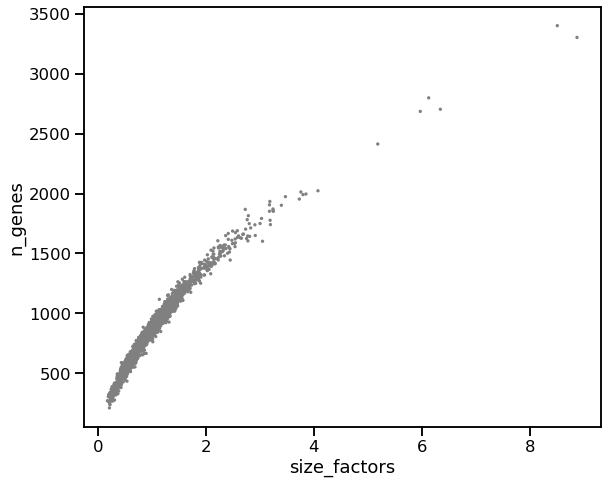

In [15]:
sc.pl.scatter(adata, 'size_factors', 'n_counts')
sc.pl.scatter(adata, 'size_factors', 'n_genes')

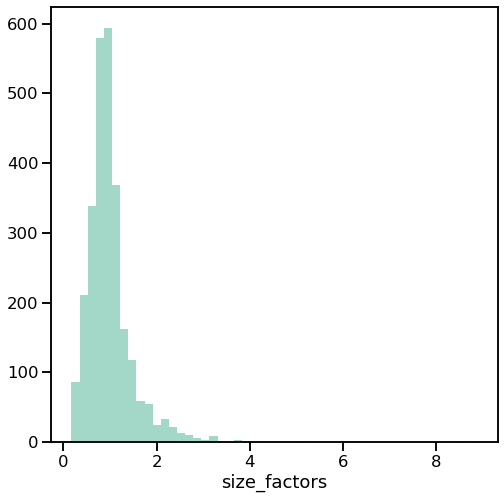

In [18]:
sns.distplot(adata.obs['size_factors'], bins=50, kde=False)